Repeat the step above by first using an embedding of your choice and then applying PCA to project the dataset into 2 dimensions. Visualize/plot the dataset with color codes depending on the classes. You must declare the dimension of the embedding.

Repetir el paso anterior usando primero un embedding de tu eleccion y luego aplicar PCA al dataset hacia dos dimensiones. Visualizar/plotear el dataset con un codigo de colores dependiendo de las clases. Deberas declarar la dimension del embedding.


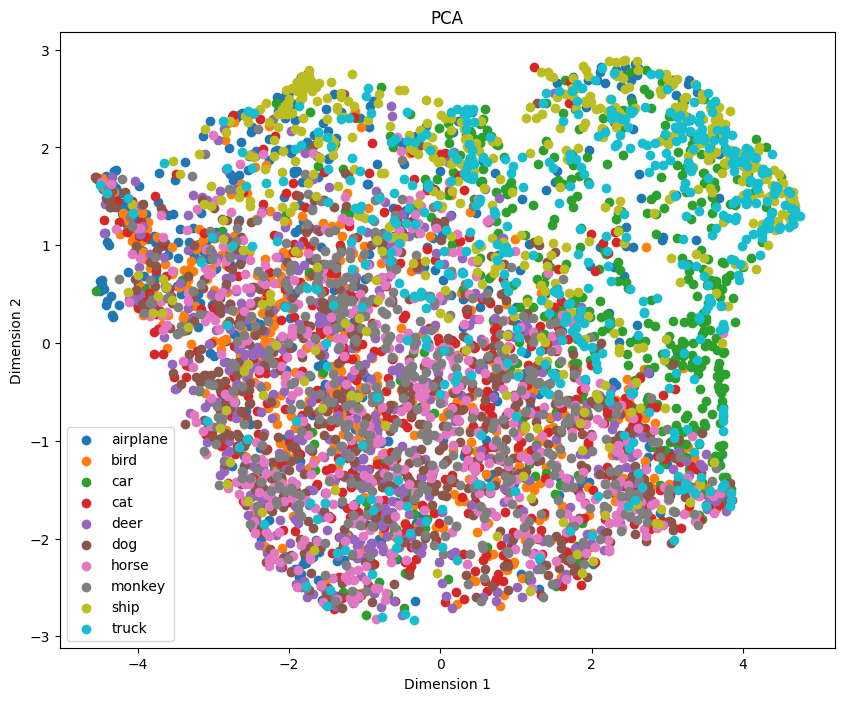

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from umap import UMAP


path = "img/"

images = []
labels = []

for clse in range(1,11):
    ruta = os.path.join(path,str(clse))
    for archivo in os.listdir(ruta): 
        if archivo.endswith(".png"):
            ruta_img = os.path.join(ruta,archivo)
            img = Image.open(ruta_img).convert("L")
            img_array = np.array(img)
            img_flat = img_array.flatten()
            images.append(img_flat)
            labels.append(clse)
            
X = np.array(images)
Y = np.array(labels)

umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

Vpca = PCA(n_components=2)
X_pca = Vpca.fit_transform(X_umap)
categories = ["","airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"] # categorías en orden (1-10)

# Crear un scatter plot
plt.figure(figsize=(10, 8))

# Plotear los puntos con códigos de color basados en las clases
for i in np.unique(Y):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], label=f'{categories[i]}')


plt.title('PCA + Embedding')

# Establecer etiquetas y leyenda
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

# Mostrar el gráfico
plt.show()
            
    